<a href="https://colab.research.google.com/github/iandvecchia/adm01007_trabalho_individual/blob/main/trabalho_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas: 
Importando as bibliotecas para o tratamento dos dados:

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format

## Conexão com o Google Drive: 
Conectando o google colab com o google drive para realizar a importação dos dados:

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importação das Bases de Dados: 


In [29]:
df = pd.read_excel('/content/drive/MyDrive/trabalho_individual/005_base_dados.xlsx')


In [30]:
df.shape

(529424, 20)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529424 entries, 0 to 529423
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Regiao            529424 non-null  object        
 1   Estado            529424 non-null  object        
 2   Municipio         529424 non-null  object        
 3   Revenda           529424 non-null  object        
 4   CNPJ              529424 non-null  object        
 5   Rua               529424 non-null  object        
 6   Numero            529211 non-null  object        
 7   Complemento       113936 non-null  object        
 8   Bairro            527991 non-null  object        
 9   Cep               529424 non-null  object        
 10  Produto           529424 non-null  object        
 11  Data Coleta       529424 non-null  datetime64[ns]
 12  Valor Venda       529424 non-null  float64       
 13  Valor Compra      0 non-null       float64       
 14  Unid

In [32]:
df = df.drop(columns=['Valor Compra'], axis=1)

In [33]:
df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data Coleta,Valor Venda,Unidade,Bandeira,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00


## Calcular o preço do litro do barril de petroleo em reais:

In [34]:
df['preco_barril_por_litro_reais'] = (df['Valor Barril'] / 158.98) * df['Valor Dolar']

df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data Coleta,Valor Venda,Unidade,Bandeira,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal,preco_barril_por_litro_reais
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82


## Calcular o preço da gasolina descontados impostos:

In [35]:
df['valor_venda_sem_impostos'] = df['Valor Venda'] - (df['Valor Venda'] * df['Imposto Estadual'] + df['Valor Venda'] * df['Imposto Federal'])

df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data Coleta,Valor Venda,Unidade,Bandeira,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal,preco_barril_por_litro_reais,valor_venda_sem_impostos
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82,4.58
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82,3.92
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82,5.05
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82,4.62
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82,5.08


In [36]:
df.describe()

,Valor Venda,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal,preco_barril_por_litro_reais,valor_venda_sem_impostos
count,529424.00,529424.00,529424.00,529424.00,529424.00,529424.00,529424.00
mean,6.46,5.06,105.31,0.20,0.06,3.34,4.72
std,0.95,0.27,12.13,0.07,0.05,0.31,0.80
min,3.17,4.59,78.98,0.12,0.00,2.82,2.59
25%,5.69,4.83,95.39,0.13,0.00,3.06,4.16
50%,6.65,5.06,107.53,0.18,0.10,3.31,4.64
75%,7.15,5.24,114.24,0.26,0.10,3.59,5.14
max,9.27,5.71,127.98,0.34,0.10,4.07,7.91


## Quantidade de amostras por estado:

AxesSubplot(0.125,0.125;0.775x0.755)


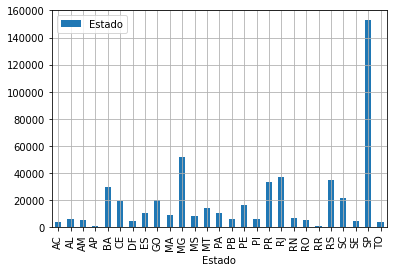

In [37]:
quantidade_por_estado = pd.DataFrame(
    df.groupby(['Estado']
    )[['Estado']].count()
)

ax = quantidade_por_estado.plot(
    kind= 'bar',
    grid=True,
)


print(ax)


## Quantidade de amostras por municipio:

In [41]:
quantidade_por_municipio = pd.DataFrame(
    df.groupby(['Municipio']
    )[['Municipio']].count()
)

print(quantidade_por_municipio)

                       Municipio
Municipio                       
ABAETETUBA                   487
ACAILANDIA                   334
ADAMANTINA                   608
AGUAS LINDAS DE GOIAS        545
ALAGOINHAS                   544
...                          ...
VOLTA REDONDA               1021
VOTORANTIM                   957
VOTUPORANGA                 1262
XANXERE                      393
XINGUARA                     641

[460 rows x 1 columns]


## Quantidade de Coletas por Produto:

AxesSubplot(0.125,0.125;0.775x0.755)


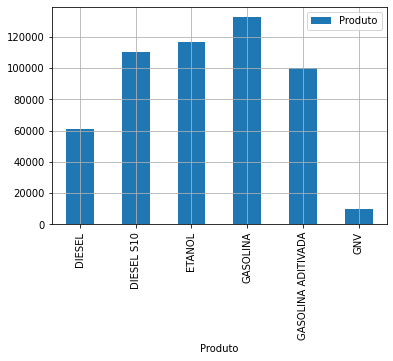

In [43]:
quantidade_por_produto = pd.DataFrame(
    df.groupby(['Produto']
    )[['Produto']].count()
)

ax = quantidade_por_produto.plot(
    kind= 'bar',
    grid=True,
)


print(ax)

## Valor Médio por dia:

In [38]:
valor_medio_data = pd.DataFrame(
    df.groupby(['Data Coleta']
    )[['Valor Venda', 'valor_venda_sem_impostos', 'Valor Barril', 'Valor Dolar', 'preco_barril_por_litro_reais']].mean()
)

print(valor_medio_data)


             Valor Venda  valor_venda_sem_impostos  Valor Barril  Valor Dolar  \
Data Coleta                                                                     
2022-01-03          5.91                      4.32         78.98         5.68   
2022-01-04          5.95                      4.30         80.00         5.68   
2022-01-05          5.88                      4.28         80.80         5.71   
2022-01-06          5.90                      4.33         81.99         5.68   
2022-01-07          6.02                      4.41         81.75         5.64   
...                  ...                       ...           ...          ...   
2022-06-24          7.15                      5.15        113.12         5.24   
2022-06-27          6.95                      5.11        115.09         5.24   
2022-06-28          6.91                      5.08        117.98         5.27   
2022-06-29          6.83                      5.02        116.26         5.18   
2022-06-30          6.73    

In [39]:
valor_medio_data.corr(method='pearson')

,Valor Venda,valor_venda_sem_impostos,Valor Barril,Valor Dolar,preco_barril_por_litro_reais
Valor Venda,1.00,0.97,0.73,-0.60,0.61
valor_venda_sem_impostos,0.97,1.00,0.72,-0.60,0.60
Valor Barril,0.73,0.72,1.00,-0.70,0.91
Valor Dolar,-0.60,-0.60,-0.70,1.00,-0.34
preco_barril_por_litro_reais,0.61,0.60,0.91,-0.34,1.00


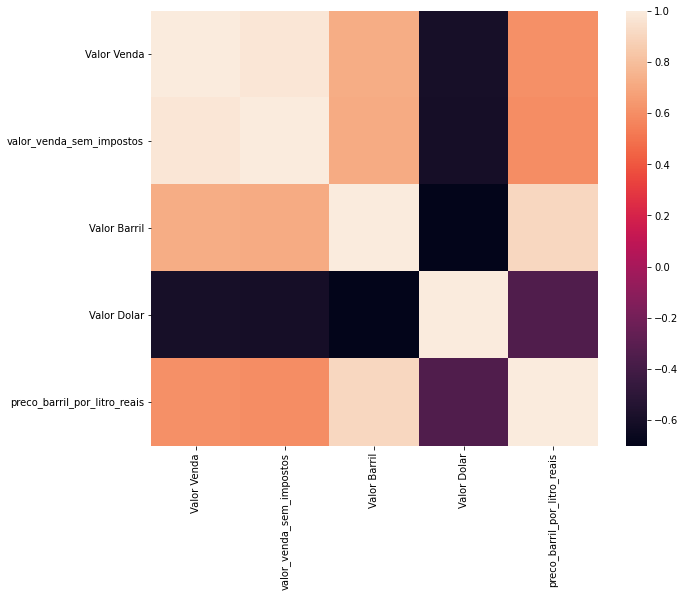

In [40]:
plt.subplots(figsize=(10,8))
sns.heatmap(valor_medio_data.corr())